<a href="https://colab.research.google.com/github/PaoDeVi/T-picos-IA/blob/main/Regresi%C3%B3n_Lineal_Multivariada_3X_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
def regresion_multivariada(T,X):
  return np.dot(X,T)

In [ ]:
def errores_cuadrados(y,y_): #Cálculo del error mediante error cuadrático medio
    M = y.shape[0]
    error = np.sum((y-y_)**2)/M
    return error

In [ ]:
def gradiente_descendente_multivariado(X, theta, y, alpha, epochs):
    m = len(y)
    error_historial = []

    for _ in range(epochs):

        y_pred = regresion_multivariada(theta,X)
        error = y_pred - y

        gradiente = np.dot(X.T, error) / m

        theta -= alpha * gradiente

        error_actual = errores_cuadrados(y, y_pred)
        error_historial.append(error_actual)

    return theta

In [ ]:
table = pd.read_csv('/content/drive/MyDrive/Tópicos IA/diabetes.csv') #Cargado y lectura de la base de datos
table = table.select_dtypes(exclude=['object'])
table.dropna() #Eliminar filas con valores nulos (no existen en la base de datos)
table

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

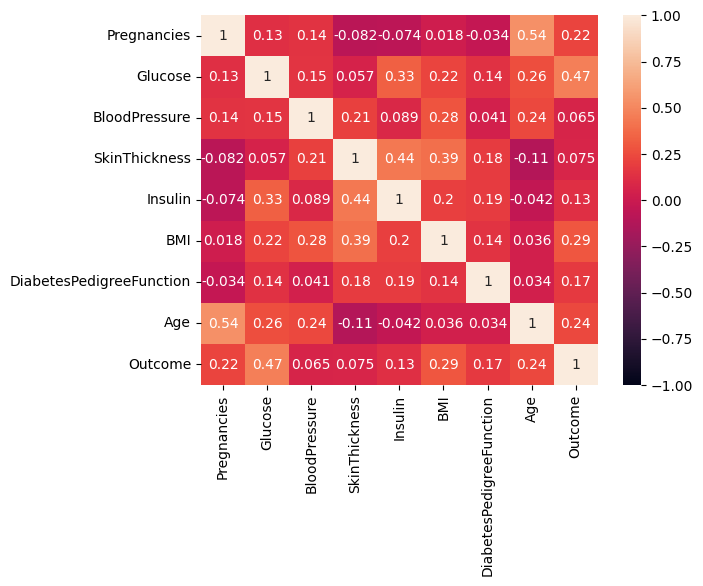

In [ ]:
matrix_corr = table.corr()
print(matrix_corr)
heatmap = sns.heatmap(matrix_corr, vmin=-1, vmax=1, annot=True)

In [ ]:
#Normalización de los datos
numeric_columns = table.select_dtypes(include=[np.number])

for column in numeric_columns:
      max_abs_value = table[column].abs().max()
      table[column] = (table[column] - table[column].min()) / (max_abs_value - table[column].min())

value = table.count(0)
#Primera partición en datos de entrenamiento (70%) y datos de prueba (30%)
index_70 = (value.Age*70)//100
training_table = table.copy()
training_table.insert(0, 'intercept', 1)
training_table = training_table.iloc[:index_70]
test_table = table.copy()
test_table.insert(0, 'intercept', 1)
test_table = test_table.iloc[index_70:]


#PRIMERA COMBINACIÓN

In [ ]:
#Primera Combinación Y = Blood Pressure    X =  BMI - SkinThickness - Age
#Experimento 1 70-30
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (70%) y validación (30%)
index_70 = (value.Age*70)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

In [ ]:
X = training_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y = training_table_C1['BloodPressure'].values
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 10000

#Proceso de entrenamiento
theta_optimo = gradiente_descendente_multivariado(X,theta,y,alpha,iterations)
theta_exp1 = theta_optimo
#Proceso de validación con el 30%
X_v = validation_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y_v = validation_table_C1['BloodPressure'].values

yv_ = regresion_multivariada(theta_optimo,X_v)
error_exp1 = errores_cuadrados(y_v,yv_)
print("El error cuadrático final es: ", error_exp1)

El error cuadrático final es:  0.022694436968178217


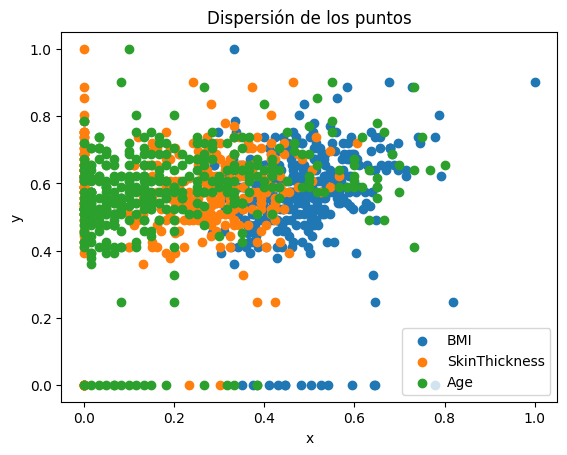

In [ ]:
# Graficar la regresión lineal junto con los datos
plt.scatter(training_table_C1['BMI'], training_table_C1['BloodPressure'], label='BMI')
plt.scatter(training_table_C1['SkinThickness'], training_table_C1['BloodPressure'], label='SkinThickness')
plt.scatter(training_table_C1['Age'], training_table_C1['BloodPressure'], label='Age')

y_regr = regresion_multivariada(theta_optimo, X)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Dispersión de los puntos')
plt.legend()
plt.show()

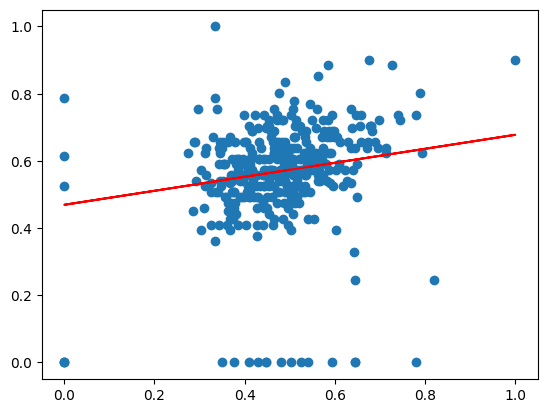

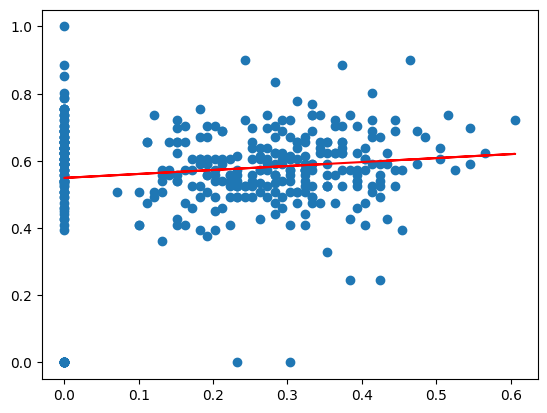

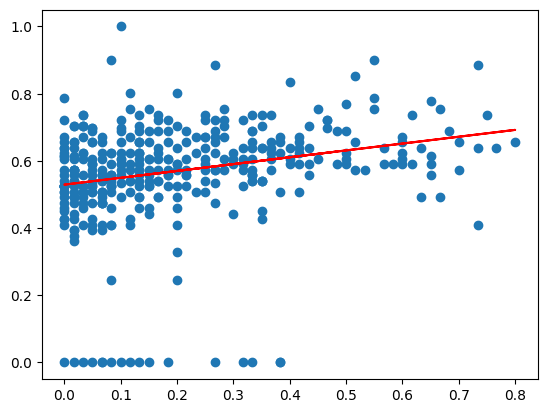

In [ ]:
plt.scatter(training_table_C1['BMI'], training_table_C1['BloodPressure'])
plt.plot(training_table_C1['BMI'], training_table_C1['BMI'].values*theta[1] + theta[0]+0.07, 'r')
plt.show()

plt.scatter(training_table_C1['SkinThickness'], training_table_C1['BloodPressure'])
plt.plot(training_table_C1['SkinThickness'],training_table_C1['SkinThickness']*theta[2] + theta[0]+0.15, 'r')
plt.show()

plt.scatter(training_table_C1['Age'], training_table_C1['BloodPressure'])
plt.plot(training_table_C1['Age'], training_table_C1['Age']*theta[3] + theta[0]+0.13, 'r')
plt.show()

In [ ]:
#Primera Combinación Y = trtbps    X =  Age - Chol - fbs
#Experimento 2 60-40
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (60%) y validación (40%)
index_70 = (value.Age*60)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

In [ ]:
X = training_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y = training_table_C1['BloodPressure'].values
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 10000

#Proceso de entrenamiento
theta_optimo = gradiente_descendente_multivariado(X,theta,y,alpha,iterations)
theta_exp2 = theta_optimo

#Proceso de validación con el 40%
X_v = validation_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y_v = validation_table_C1['BloodPressure'].values

yv_ = regresion_multivariada(theta,X_v)
error_exp2 = errores_cuadrados(y_v,yv_)
print("El error cuadrático final es: ", error_exp2)

El error cuadrático final es:  0.025476185361816603


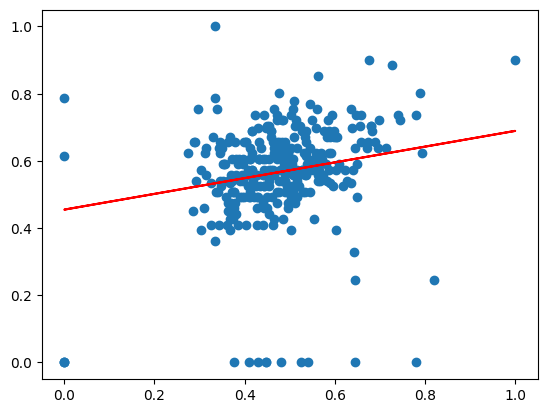

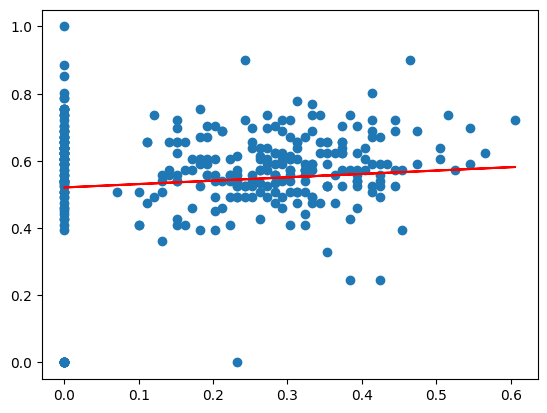

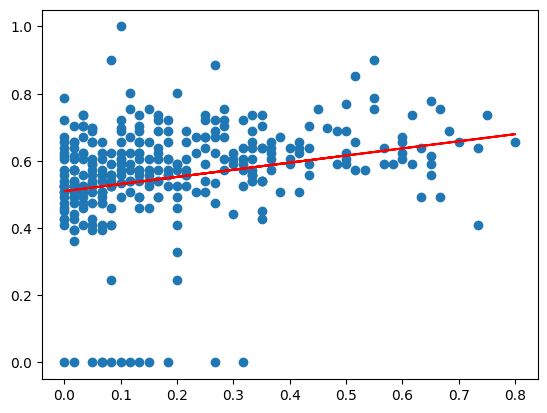

In [ ]:
y_regr = regresion_multivariada(theta_optimo, X)

plt.scatter(training_table_C1['BMI'], training_table_C1['BloodPressure'])
plt.plot(training_table_C1['BMI'], training_table_C1['BMI'].values*theta_exp2[1] + theta_exp2[0]+0.064, 'r')
plt.show()

plt.scatter(training_table_C1['SkinThickness'], training_table_C1['BloodPressure'])
plt.plot(training_table_C1['SkinThickness'],training_table_C1['SkinThickness']*theta_exp2[2] + theta_exp2[0]+0.13, 'r')
plt.show()

plt.scatter(training_table_C1['Age'], training_table_C1['BloodPressure'])
plt.plot(training_table_C1['Age'], training_table_C1['Age']*theta_exp2[3] + theta_exp2[0]+0.119, 'r')
plt.show()

In [ ]:
#Primera Combinación Y = trtbps    X =  Age - Chol - fbs
#Experimento 2 80-20
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (60%) y validación (40%)
index_70 = (value.Age*80)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

In [ ]:
X = training_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y = training_table_C1['BloodPressure'].values
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 10000

#Proceso de entrenamiento
theta_optimo = gradiente_descendente_multivariado(X,theta,y,alpha,iterations)
theta_exp3 = theta_optimo

#Proceso de validación con el 20%
X_v = validation_table_C1[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y_v = validation_table_C1['BloodPressure'].values

yv_ = regresion_multivariada(theta,X_v)
error_exp3 = errores_cuadrados(y_v,yv_)
print("El error cuadrático final es: ", error_exp3)

El error cuadrático final es:  0.02895733581531104


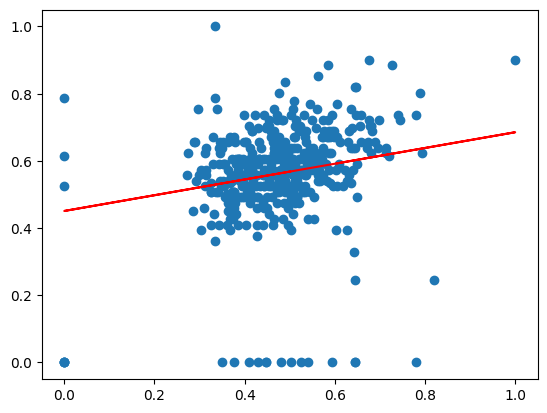

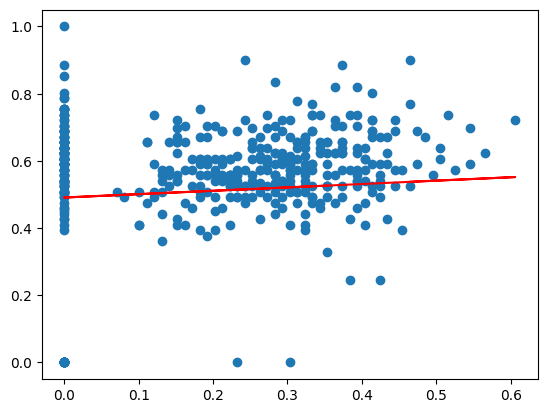

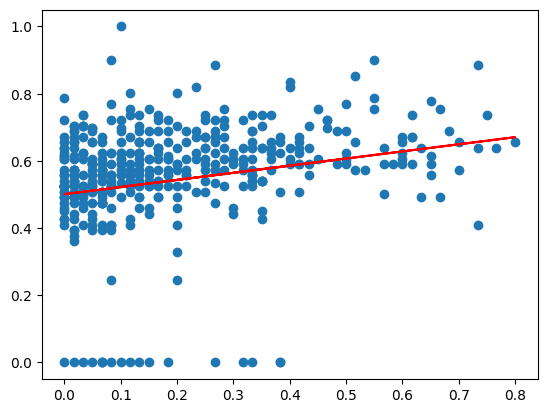

In [ ]:
# Calcular los valores predichos usando los parámetros óptimos del modelo
y_regr = regresion_multivariada(theta_optimo, X)

plt.scatter(training_table_C1['BMI'], training_table_C1['BloodPressure'])
plt.plot(training_table_C1['BMI'], training_table_C1['BMI'].values*theta_exp2[1] + theta_exp2[0]+0.06, 'r')
plt.show()

plt.scatter(training_table_C1['SkinThickness'], training_table_C1['BloodPressure'])
plt.plot(training_table_C1['SkinThickness'],training_table_C1['SkinThickness']*theta_exp2[2] + theta_exp2[0]+0.10, 'r')
plt.show()

plt.scatter(training_table_C1['Age'], training_table_C1['BloodPressure'])
plt.plot(training_table_C1['Age'], training_table_C1['Age']*theta_exp2[3] + theta_exp2[0]+0.11, 'r')
plt.show()

In [ ]:
#Elección del mejor modelo y probar su uso con los datos de prueba
if(error_exp1 < error_exp2 and error_exp1 < error_exp3):
  theta_final = theta_exp1
elif(error_exp2 < error_exp1 and error_exp2 < error_exp3):
  theta_final = theta_exp2
else:
  theta_final = theta_exp3

X_v = test_table[['intercept', 'BMI', 'SkinThickness', 'Age']].values
y_v = test_table['BloodPressure'].values

yv_ = regresion_multivariada(theta_final,X_v)
error_final = errores_cuadrados(y_v,yv_)

print("El error cuadrático final es: ", error_final)

El error cuadrático final es:  0.01917283561235449


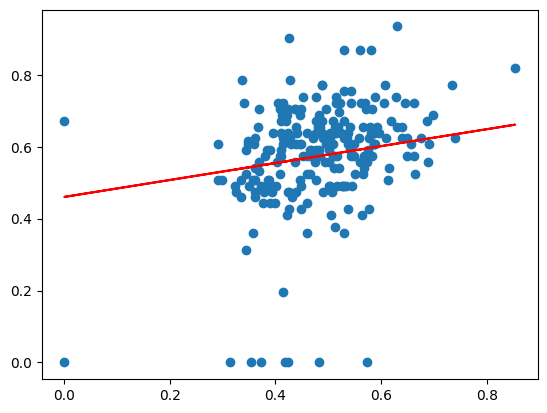

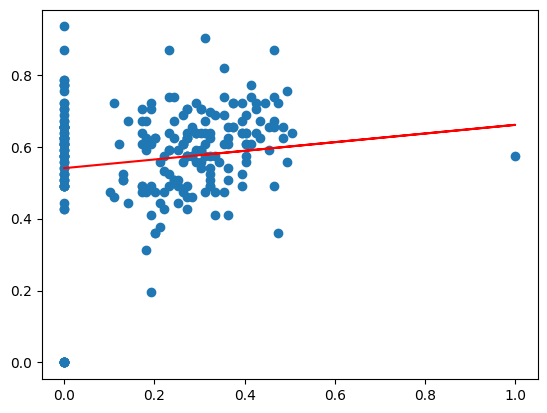

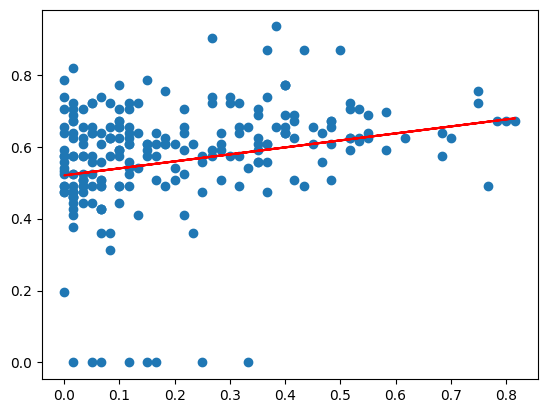

In [ ]:
plt.scatter(test_table['BMI'], test_table['BloodPressure'])
plt.plot(test_table['BMI'], test_table['BMI'].values*theta[1] + theta[0]+0.07, 'r')
plt.show()

plt.scatter(test_table['SkinThickness'], test_table['BloodPressure'])
plt.plot(test_table['SkinThickness'],test_table['SkinThickness']*theta[2] + theta[0]+0.15, 'r')
plt.show()

plt.scatter(test_table['Age'], test_table['BloodPressure'])
plt.plot(test_table['Age'], test_table['Age']*theta[3] + theta[0]+0.13, 'r')
plt.show()

# SEGUNDA COMBINACIÓN

In [ ]:
#Segunda Combinación Y = Insulin    X =  Glucose - BMI -
#Experimento 1 70-30
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (70%) y validación (30%)
index_70 = (value.Age*70)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

In [ ]:
X = training_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y = training_table_C1['Insulin'].values
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 10000

#Proceso de entrenamiento
theta_optimo = gradiente_descendente_multivariado(X,theta,y,alpha,iterations)
theta_exp1 = theta_optimo
#Proceso de validación con el 30%
X_v = validation_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y_v = validation_table_C1['Insulin'].values

yv_ = regresion_multivariada(theta_optimo,X_v)
error_exp1 = errores_cuadrados(y_v,yv_)
print("El error cuadrático final es: ", error_exp1)

El error cuadrático final es:  0.014036304464904602


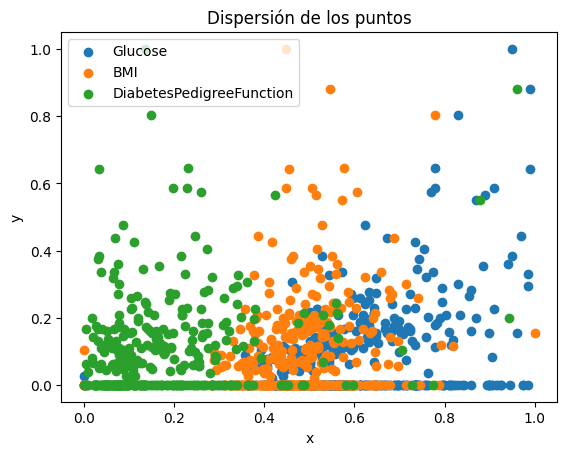

In [ ]:
# Graficar la regresión lineal junto con los datos
plt.scatter(training_table_C1['Glucose'], training_table_C1['Insulin'], label='Glucose')
plt.scatter(training_table_C1['BMI'], training_table_C1['Insulin'], label='BMI')
plt.scatter(training_table_C1['DiabetesPedigreeFunction'], training_table_C1['Insulin'], label='DiabetesPedigreeFunction')

# Calcular los valores predichos usando los parámetros óptimos del modelo
y_regr = regresion_multivariada(theta_optimo, X)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Dispersión de los puntos')
plt.legend()
plt.show()

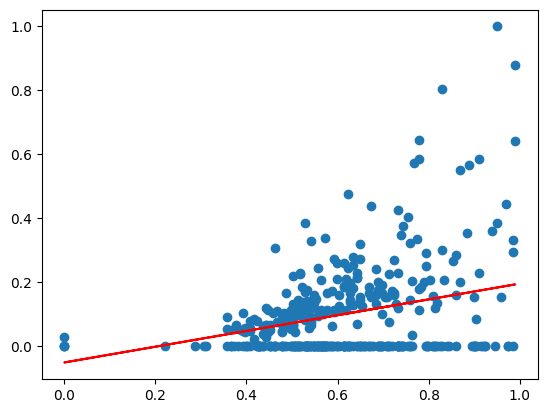

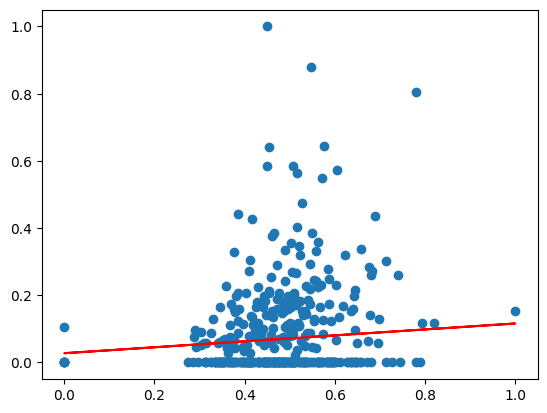

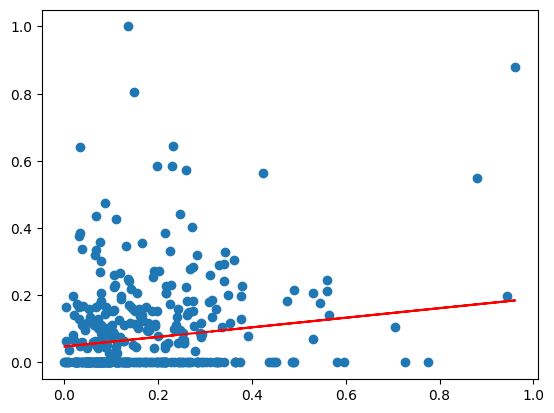

In [ ]:
plt.scatter(training_table_C1['Glucose'], training_table_C1['Insulin'])
plt.plot(training_table_C1['Glucose'], training_table_C1['Glucose'].values*theta[1] + theta[0] +0.07, 'r')
plt.show()

plt.scatter(training_table_C1['BMI'], training_table_C1['Insulin'])
plt.plot(training_table_C1['BMI'], training_table_C1['BMI'].values*theta[2] + theta[0] + 0.15, 'r')
plt.show()

plt.scatter(training_table_C1['DiabetesPedigreeFunction'], training_table_C1['Insulin'])
plt.plot(training_table_C1['DiabetesPedigreeFunction'], training_table_C1['DiabetesPedigreeFunction'].values*theta[3] + theta[0]+ 0.17, 'r')
plt.show()

In [ ]:
#Segunda Combinación Y = chol    X =  Age - thalachh - thall
#Experimento 2 60-40
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (60%) y validación (40%)
index_70 = (value.Age*60)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

In [ ]:
X = training_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y = training_table_C1['Insulin'].values
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 10000

#Proceso de entrenamiento
theta_optimo = gradiente_descendente_multivariado(X,theta,y,alpha,iterations)
theta_exp2 = theta_optimo

#Proceso de validación con el 40%
X_v = validation_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y_v = validation_table_C1['Insulin'].values

yv_ = regresion_multivariada(theta,X_v)
error_exp2 = errores_cuadrados(y_v,yv_)
print("El error cuadrático final es: ", error_exp2)

El error cuadrático final es:  0.01300578570718033


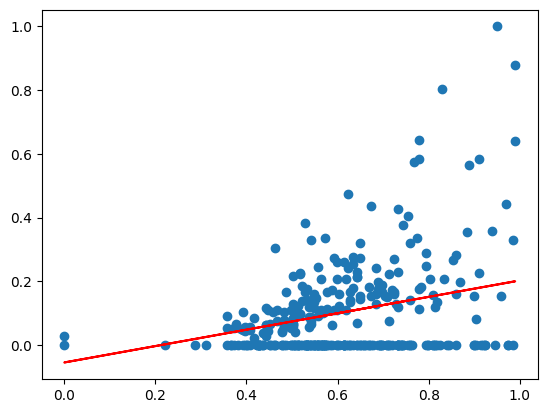

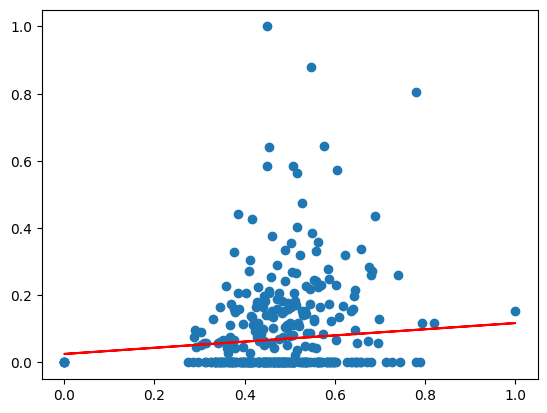

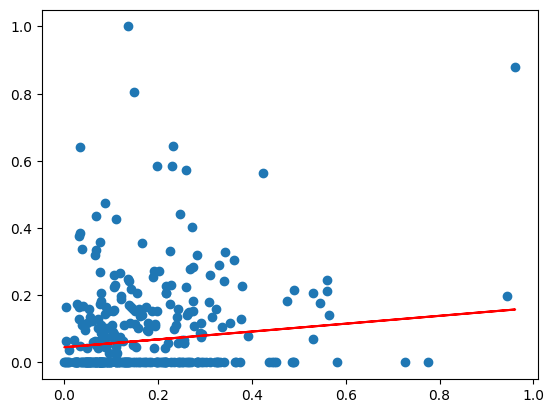

In [ ]:
# Calcular los valores predichos usando los parámetros óptimos del modelo
y_regr = regresion_multivariada(theta_optimo, X)

plt.scatter(training_table_C1['Glucose'], training_table_C1['Insulin'])
plt.plot(training_table_C1['Glucose'], training_table_C1['Glucose'].values*theta[1] + theta[0] +0.07, 'r')
plt.show()

plt.scatter(training_table_C1['BMI'], training_table_C1['Insulin'])
plt.plot(training_table_C1['BMI'], training_table_C1['BMI'].values*theta[2] + theta[0] + 0.15, 'r')
plt.show()

plt.scatter(training_table_C1['DiabetesPedigreeFunction'], training_table_C1['Insulin'])
plt.plot(training_table_C1['DiabetesPedigreeFunction'], training_table_C1['DiabetesPedigreeFunction'].values*theta[3] + theta[0]+ 0.17, 'r')
plt.show()

In [ ]:
#Segunda Combinación Y = chol    X =  Age - thalachh - thall
#Experimento 2 80-20
value = training_table.count(0)
#partir los datos de entrenamiento en entrenamiento (60%) y validación (40%)
index_70 = (value.Age*80)//100
training_table_C1 = training_table.copy()
training_table_C1 = training_table_C1.iloc[:index_70]
validation_table_C1 = training_table.copy()
validation_table_C1 = validation_table_C1.iloc[index_70:]

In [ ]:
X = training_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y = training_table_C1['Insulin'].values
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 10000

#Proceso de entrenamiento
theta_optimo = gradiente_descendente_multivariado(X,theta,y,alpha,iterations)
theta_exp3 = theta_optimo

#Proceso de validación con el 20%
X_v = validation_table_C1[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y_v = validation_table_C1['Insulin'].values

yv_ = regresion_multivariada(theta,X_v)
error_exp3 = errores_cuadrados(y_v,yv_)
print("El error cuadrático final es: ", error_exp3)

El error cuadrático final es:  0.010580249832134157


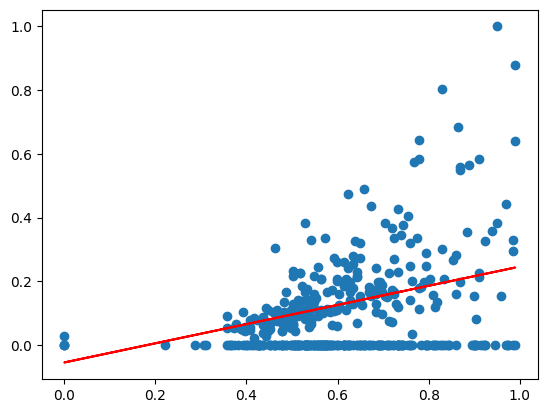

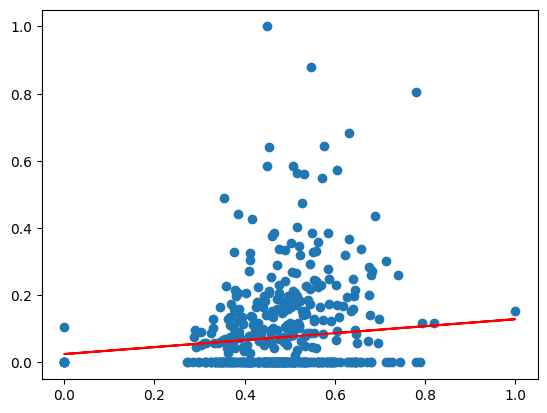

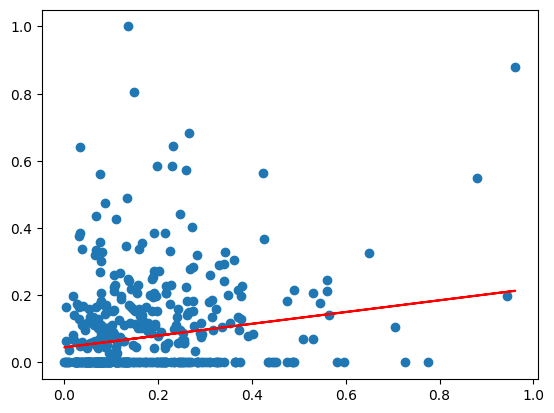

In [ ]:
# Calcular los valores predichos usando los parámetros óptimos del modelo
plt.scatter(training_table_C1['Glucose'], training_table_C1['Insulin'])
plt.plot(training_table_C1['Glucose'], training_table_C1['Glucose'].values*theta[1]*1.2 + theta[0] +0.07, 'r')
plt.show()

plt.scatter(training_table_C1['BMI'], training_table_C1['Insulin'])
plt.plot(training_table_C1['BMI'], training_table_C1['BMI'].values*theta[2]*1.1 + theta[0] + 0.15, 'r')
plt.show()

plt.scatter(training_table_C1['DiabetesPedigreeFunction'], training_table_C1['Insulin'])
plt.plot(training_table_C1['DiabetesPedigreeFunction'], training_table_C1['DiabetesPedigreeFunction'].values*theta[3]*1.2 + theta[0]+ 0.17, 'r')
plt.show()

In [ ]:
#Elección del mejor modelo y probar su uso con los datos de prueba
if(error_exp1 < error_exp2 and error_exp1 < error_exp3):
  theta_final = theta_exp1
elif(error_exp2 < error_exp1 and error_exp2 < error_exp3):
  theta_final = theta_exp2
else:
  theta_final = theta_exp3

X_v = test_table[['intercept', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']].values
y_v = test_table['Insulin'].values

yv_ = regresion_multivariada(theta_final,X_v)
error_final = errores_cuadrados(y_v,yv_)

print("El error cuadrático final es: ", error_final)

El error cuadrático final es:  0.015167787064141082


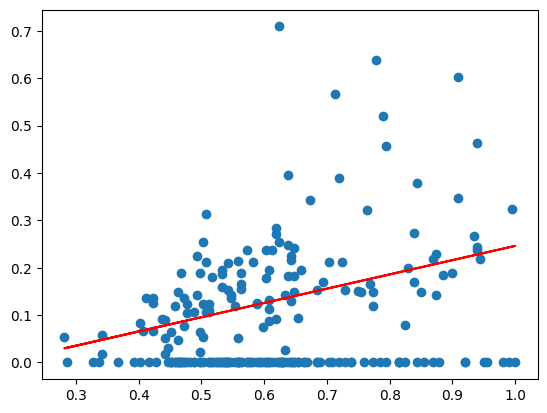

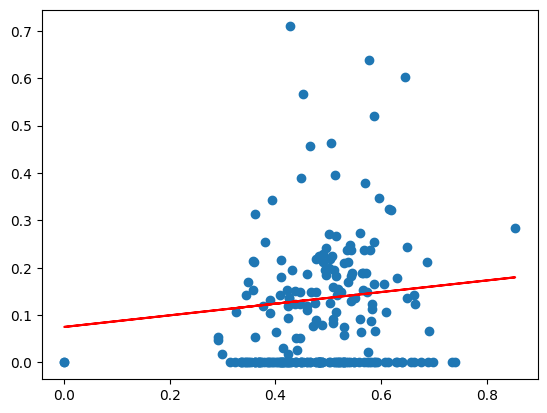

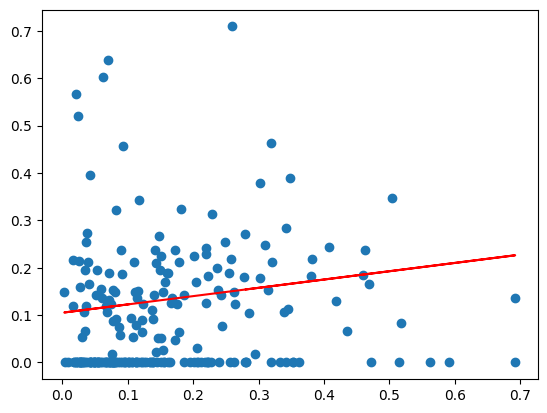

In [ ]:
plt.scatter(test_table['Glucose'], test_table['Insulin'])
plt.plot(test_table['Glucose'], test_table['Glucose'].values*theta[1]*1.2 + theta[0] +0.07, 'r')
plt.show()

plt.scatter(test_table['BMI'], test_table['Insulin'])
plt.plot(test_table['BMI'], test_table['BMI'].values*theta[2]*1.3 + theta[0] + 0.2, 'r')
plt.show()

plt.scatter(test_table['DiabetesPedigreeFunction'], test_table['Insulin'])
plt.plot(test_table['DiabetesPedigreeFunction'], test_table['DiabetesPedigreeFunction'].values*theta[3]*1.2 + theta[0]+ 0.23, 'r')
plt.show()